In [1]:
import gstlearn as gl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cov = gl.CovDiffusionAdvection()

scale=1
vel = gl.VectorDouble(2)
vel[0] = 0
vel[1] = 5
scaleTime = 0.9
sigma2 = 1
p1 = 1
p2 = 1

ctxt = gl.CovContext()
cova1 = gl.CovAniso.createIsotropic(type=gl.ECov.BESSEL_K,range = scale, param =p1, flagRange= False,ctxt=ctxt)
cova2 = gl.CovAniso.createIsotropic(type=gl.ECov.BESSEL_K,range = scale, param =p2, flagRange= False,ctxt=ctxt)

#cova2 = None

covP = p1 +1
if cova1 is None:
    covP = p2 +1
else :
    if cova2 is not None:
        covP = (p1 + 1 + p2 +1)
covP-= 1
        
covprod = gl.CovAniso.createIsotropic(type=gl.ECov.BESSEL_K,range = scale, param =covP, flagRange= False,ctxt=ctxt)
cov = gl.CovDiffusionAdvection.create(cova1,cova2,scaleTime,vel,sigma2)


### Spatial Trace

In [3]:
nx1 = 40
nx2 = 40
N=2**7
result = np.array(cov.evalCovFFT([nx1,nx2],0,N).getValues()).reshape(N,N)

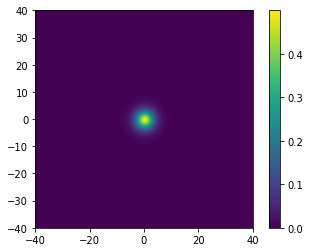

In [4]:
plt.imshow(result,extent = [-nx1,nx1,-nx2,nx2])
plt.colorbar()

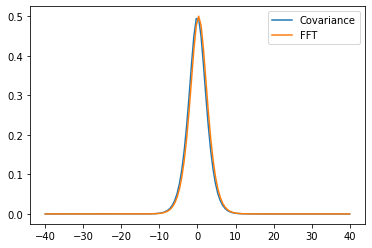

In [5]:
mH1 = nx1
mH2 = nx2

X1 = np.linspace(-mH1,mH1,N) 
X2 = np.linspace(-mH2,mH2,N) 
covM = [0.5*covprod.eval(0,0,gl.SpacePoint([0,0]),gl.SpacePoint([0,i])) for i in X1]
plt.plot(X1,covM,label = "Covariance")
plt.plot(X1,result[int(N/2),:],label="FFT")
plt.legend()


In [6]:
nx1 = 30
nx2 = 30
N=2**8

ntimes = 20
restime = np.zeros(shape=ntimes)
result = np.zeros(shape = (N*N,ntimes))
times = np.arange(ntimes) * 0.5
for it,time in enumerate(times):
    result[:,it] = np.array(cov.evalCovFFT([nx1,nx2],time,N).getValues())
    restime[it] = result[:,it].reshape(N,N)[int(N/2),int(N/2)]

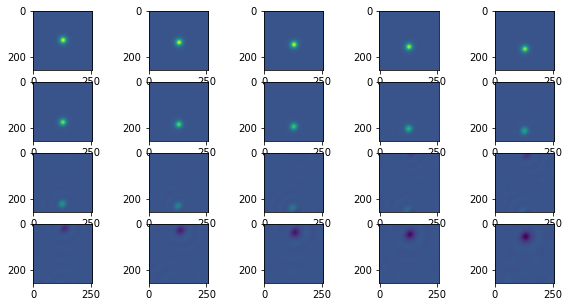

In [7]:
fig, axs = plt.subplots(nrows=4,ncols=5, figsize=(10,5))
k = 0
for i in range(4) : 
    for j in range(5):
        pt = axs[i,j].imshow(result[:,k].reshape(N,N))
        pt.set_clim([result.min(),result.max()])
        k+=1


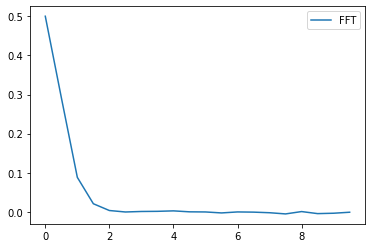

In [8]:
plt.plot(times,restime,label = "FFT")
if cova1 is None :
    plt.plot(times,0.5*np.exp(-times*scaleTime),"--",label = "Theoretical")
plt.legend()